<a href="https://colab.research.google.com/github/xerxes-y/nosql-framework/blob/master/Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simulation


* Tasks: 
  * Generating training dataset from binormal distribution.
  * Imlementing the following models: 
    * Linear model
    * Best regression function
    * Monte-Carlo (MC) simulation

### Initialize required library

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statistics

# Linear models
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# MSE
from sklearn.metrics import mean_squared_error, r2_score

# normal distribution
from scipy.stats import multivariate_normal

import warnings
warnings.filterwarnings('ignore')

### Generating 10 observations and ploting data.

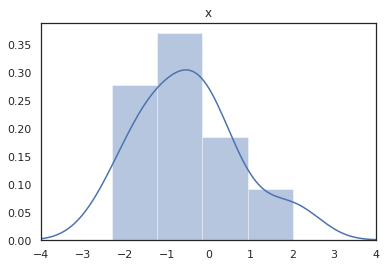

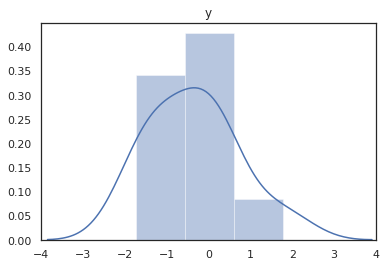

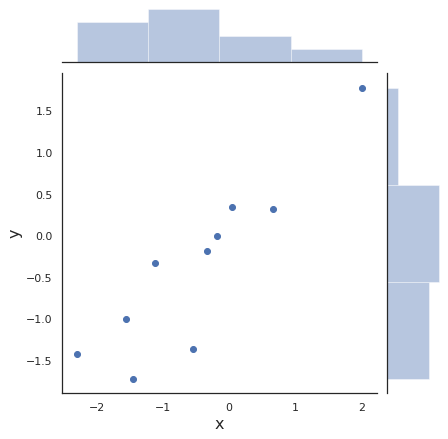

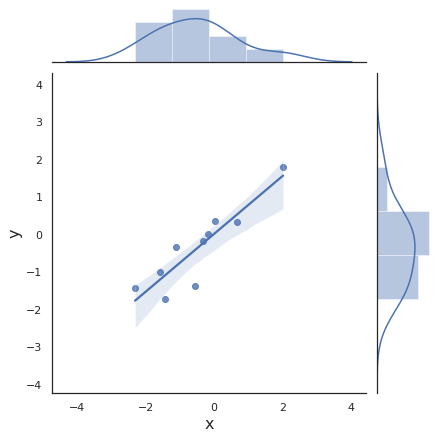

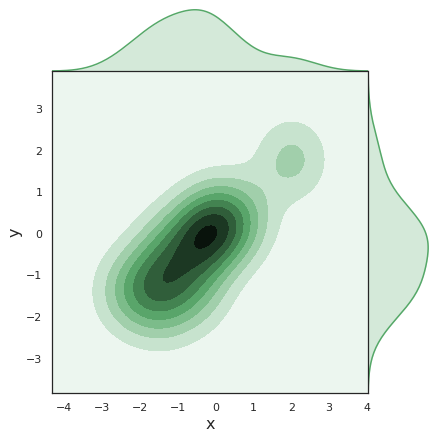

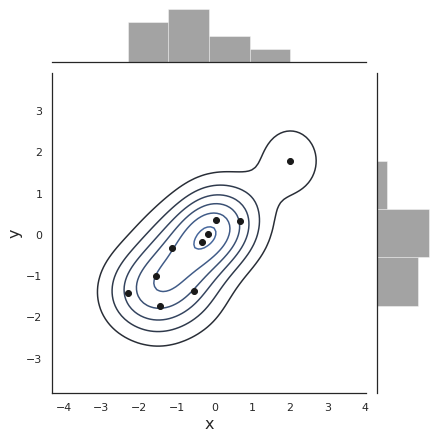

In [54]:
sns.set(style="white", color_codes=True)

# generate data 
rv = multivariate_normal([0., 0.], [[1., 0.8], [0.8, 1.]])
data = rv.rvs(size=10, random_state=12345)
x, y = data[:,0],data[:,1]
target = rv.pdf(data)

# plot data
sns.distplot(x)
plt.title('x')
plt.xlim(-4, 4)
plt.show()
sns.distplot(y)
plt.title('y')
plt.xlim(-4, 4)
plt.show()

df = pd.DataFrame(data)

jPlot = sns.jointplot(x, y, data=df)
jPlot.set_axis_labels('x', 'y', fontsize=16)

jPlot = sns.jointplot(x, y, data=df, kind="reg")
jPlot.set_axis_labels('x', 'y', fontsize=16)

jPlot = sns.jointplot(x, y, data=df,kind="kde", space=0, color="g")
jPlot.set_axis_labels('x', 'y', fontsize=16)

jPlot = (sns.jointplot(x, y, data=df, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))
jPlot.set_axis_labels('x', 'y', fontsize=16)


### Ploting bivariate distribution.


In [0]:
# Plot bivariate distribution
def generate_surface():
    # grid size
    nb_of_x = 100 
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    # Generate grid
    x1, x2 = np.meshgrid(x1s, x2s) 
    pos = np.dstack((x1, x2))
    pdf = rv.pdf(pos)
    # x1, x2, pdf(x1,x2)
    return x1, x2, pdf 

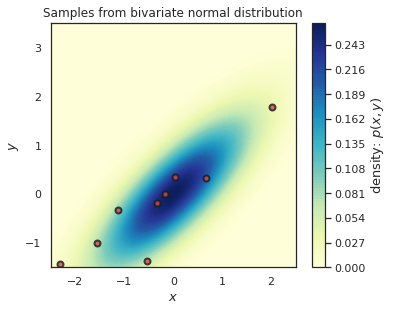

In [56]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface()
con = ax.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
# Plot samples
ax.plot(x, y, 'ro', alpha=.8,
        markeredgecolor='k', markeredgewidth=2)
ax.set_xlabel('$x$', fontsize=13)
ax.set_ylabel('$y$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(x, y)$', fontsize=13)
plt.show()
#


### Linear model & best regression function on 10 observations.

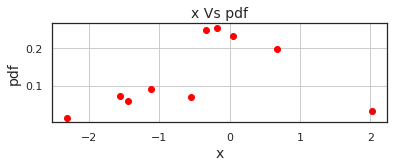

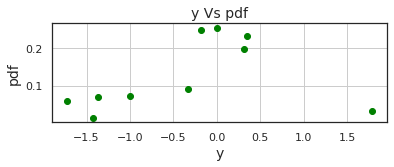

In [57]:
# plot data and pdf
plt.figure() 

plt.subplot(2, 1, 1) 
plt.scatter(x, target, color='red')
plt.title('x Vs pdf', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('pdf', fontsize=14)
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
plt.scatter(y, target, color='green')
plt.title('y Vs pdf', fontsize=14)
plt.xlabel('y', fontsize=14)
plt.ylabel('pdf', fontsize=14)
plt.grid(True)
plt.show()

**Linear Regression**

In [58]:
# Implementing Linear regression.
linear_reg = LinearRegression()

# Fit with train data.
linear_reg.fit(data, target)

# Predict on train data.
prediction = linear_reg.predict(data)

# The coefficients
print('Coefficients: \n', linear_reg.coef_)
print('Intercept: \n', linear_reg.intercept_)

# The mean squared error
print('Mean squared error: %.18f' % mean_squared_error(target, prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(target, prediction))

# Generate with parameter that obtained from last step. 
""" prediction_with_parameter == prediction """
coef = linear_reg.coef_
intercept = linear_reg.intercept_
prediction_with_parameter = np.zeros(10)
for i in range(data.shape[0]):
   prediction_with_parameter[i] = (intercept) + (coef[0])* data[i,0] + (coef[1])*data[i,1]


Coefficients: 
 [0.00342502 0.02534047]
Intercept: 
 0.13794754720107022
Mean squared error: 0.007215308212923491
Coefficient of determination: 0.11


**Ordinary least squares (OLS) regression**

In [59]:
# with statsmodels
X = sm.add_constant(data) # adding a constant
 
model = sm.OLS(target, X).fit()
predictions = model.predict(X) 

# The mean squared error
print('Mean squared error: %.18f' % mean_squared_error(target, predictions))
 
print_model = model.summary()
print(print_model)


Mean squared error: 0.007215308212923492
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                 -0.150
Method:                 Least Squares   F-statistic:                    0.4124
Date:                Mon, 25 May 2020   Prob (F-statistic):              0.677
Time:                        12:58:00   Log-Likelihood:                 10.468
No. Observations:                  10   AIC:                            -14.94
Df Residuals:                       7   BIC:                            -14.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

**Conditional Expectation**

In [60]:
# conditional expectation
# E[Y |X = x]
x = np.array([data[:,0]])
y = np.array([data[:,1]])

E_x = statistics.mean(data[:,0])
E_y = statistics.mean(data[:,1])

covariance_xy = np.cov(x,y)
variance_x = np.var(x)

beta_estimated = (covariance_xy[0,1]/variance_x)


y_given_by_x = E_y + (beta_estimated * (data[:,0] - E_x))

err_train = 0
for i in range(y_given_by_x.shape[0]):
   err_train += (data[i,1] - y_given_by_x[i])

print('error: %.18f'% err_train)


error: 0.000000000000000444


 **Plot**

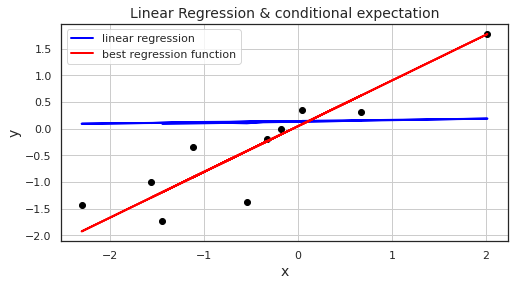

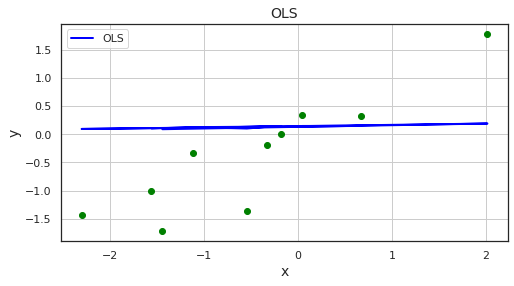

In [61]:
x_plot = np.linspace(-2, 2, 10)
X_plot = x_plot[:, np.newaxis]

plt.figure(figsize=(8, 4))
plt.scatter(data[:,0], data[:,1],  color='black')
plt.plot(data[:,0], prediction, color='blue', linewidth=2,label='linear regression')  #linear model
plt.plot(data[:,0], y_given_by_x.T, color='red', linewidth=2,label='best regression function')  # best regression function
plt.title('Linear Regression & conditional expectation', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(data[:,0], data[:,1],  color='green')
plt.plot(data[:,0], predictions, color='blue', linewidth=2, label='OLS')
plt.title('OLS', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### Generating 1000 observations and test model.

**Test Data**

In [0]:
# 1000 observations.
rv = multivariate_normal([0., 0.], [[1., 0.8], [0.8, 1.]])
data_test = rv.rvs(size=1000, random_state=12345)
x_test, y_test = data_test[:,0],data_test[:,1]
target_test = rv.pdf(data_test)

**Linear Regression on test data**

In [63]:
prediction_test = linear_reg.predict(data_test)
# The mean squared error
print('Mean squared error: %.18f' % mean_squared_error(target_test, prediction_test))

Mean squared error: 0.006915776473852451


**Best Regression on test data**

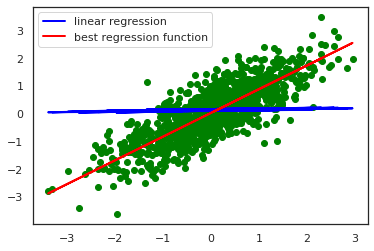

In [64]:
# conditional expectation
# E[Y |X = x]
x_test = np.array([x_test])
y_test = np.array([y_test])
# mean
E_x_test = statistics.mean(data_test[:,0])
E_y_test = statistics.mean(data_test[:,1])

y_given_by_x_test = E_y_test + (beta_estimated * (data_test[:,0] - E_x_test))

err_test = 0
for i in range(y_given_by_x_test.shape[0]):
   err_test += (data_test[i,1] - y_given_by_x_test[i])

#print('error: %.18f'% err)

# plot
plt.scatter(data_test[:,0],data_test[:,1], color='green')
plt.plot(data_test[:,0], prediction_test, color='blue', linewidth=2,label='linear regression')  #linear model
plt.plot(data_test[:,0], y_given_by_x_test.T, color='red', linewidth=2,label='best regression function')  # best regression function
plt.legend(loc='upper left')
plt.show()



### Monte carlo

**Generating data**

In [0]:
def get_rand_number(size):
    rv = multivariate_normal([0., 0.], [[1., 0.8], [0.8, 1.]])
    data = rv.rvs(size=size)
    target = rv.pdf(data)
    return [data,target]

**Linear Regression**

In [0]:
def linear_model(data,target):
  linear_reg = LinearRegression().fit(data, target)
  return linear_reg


**Best Regression function**

In [0]:
def conditionl_regression(data,target):
  x = np.array([data[:,0]])
  y = np.array([data[:,1]])

  E_x = statistics.mean(data[:,0])
  E_y = statistics.mean(data[:,1])

  covariance_xy = np.cov(x,y)
  variance_x = np.var(x)

  beta_estimated = (covariance_xy[0,1]/variance_x)

  y_given_by_x = E_y + (beta_estimated * (data[:,0] - E_x))

  return (y_given_by_x,beta_estimated)

**Monte-carlo**

In [0]:
def crude_monte_carlo(num_samples):
    x = get_rand_number(num_samples) 

    # linear model
    model = linear_model(x[0],x[1])

    # conditional expectation
    result = conditionl_regression(x[0],x[1])
    y_conditional_pred = result[0]
    beta = result[1]

    return model, beta

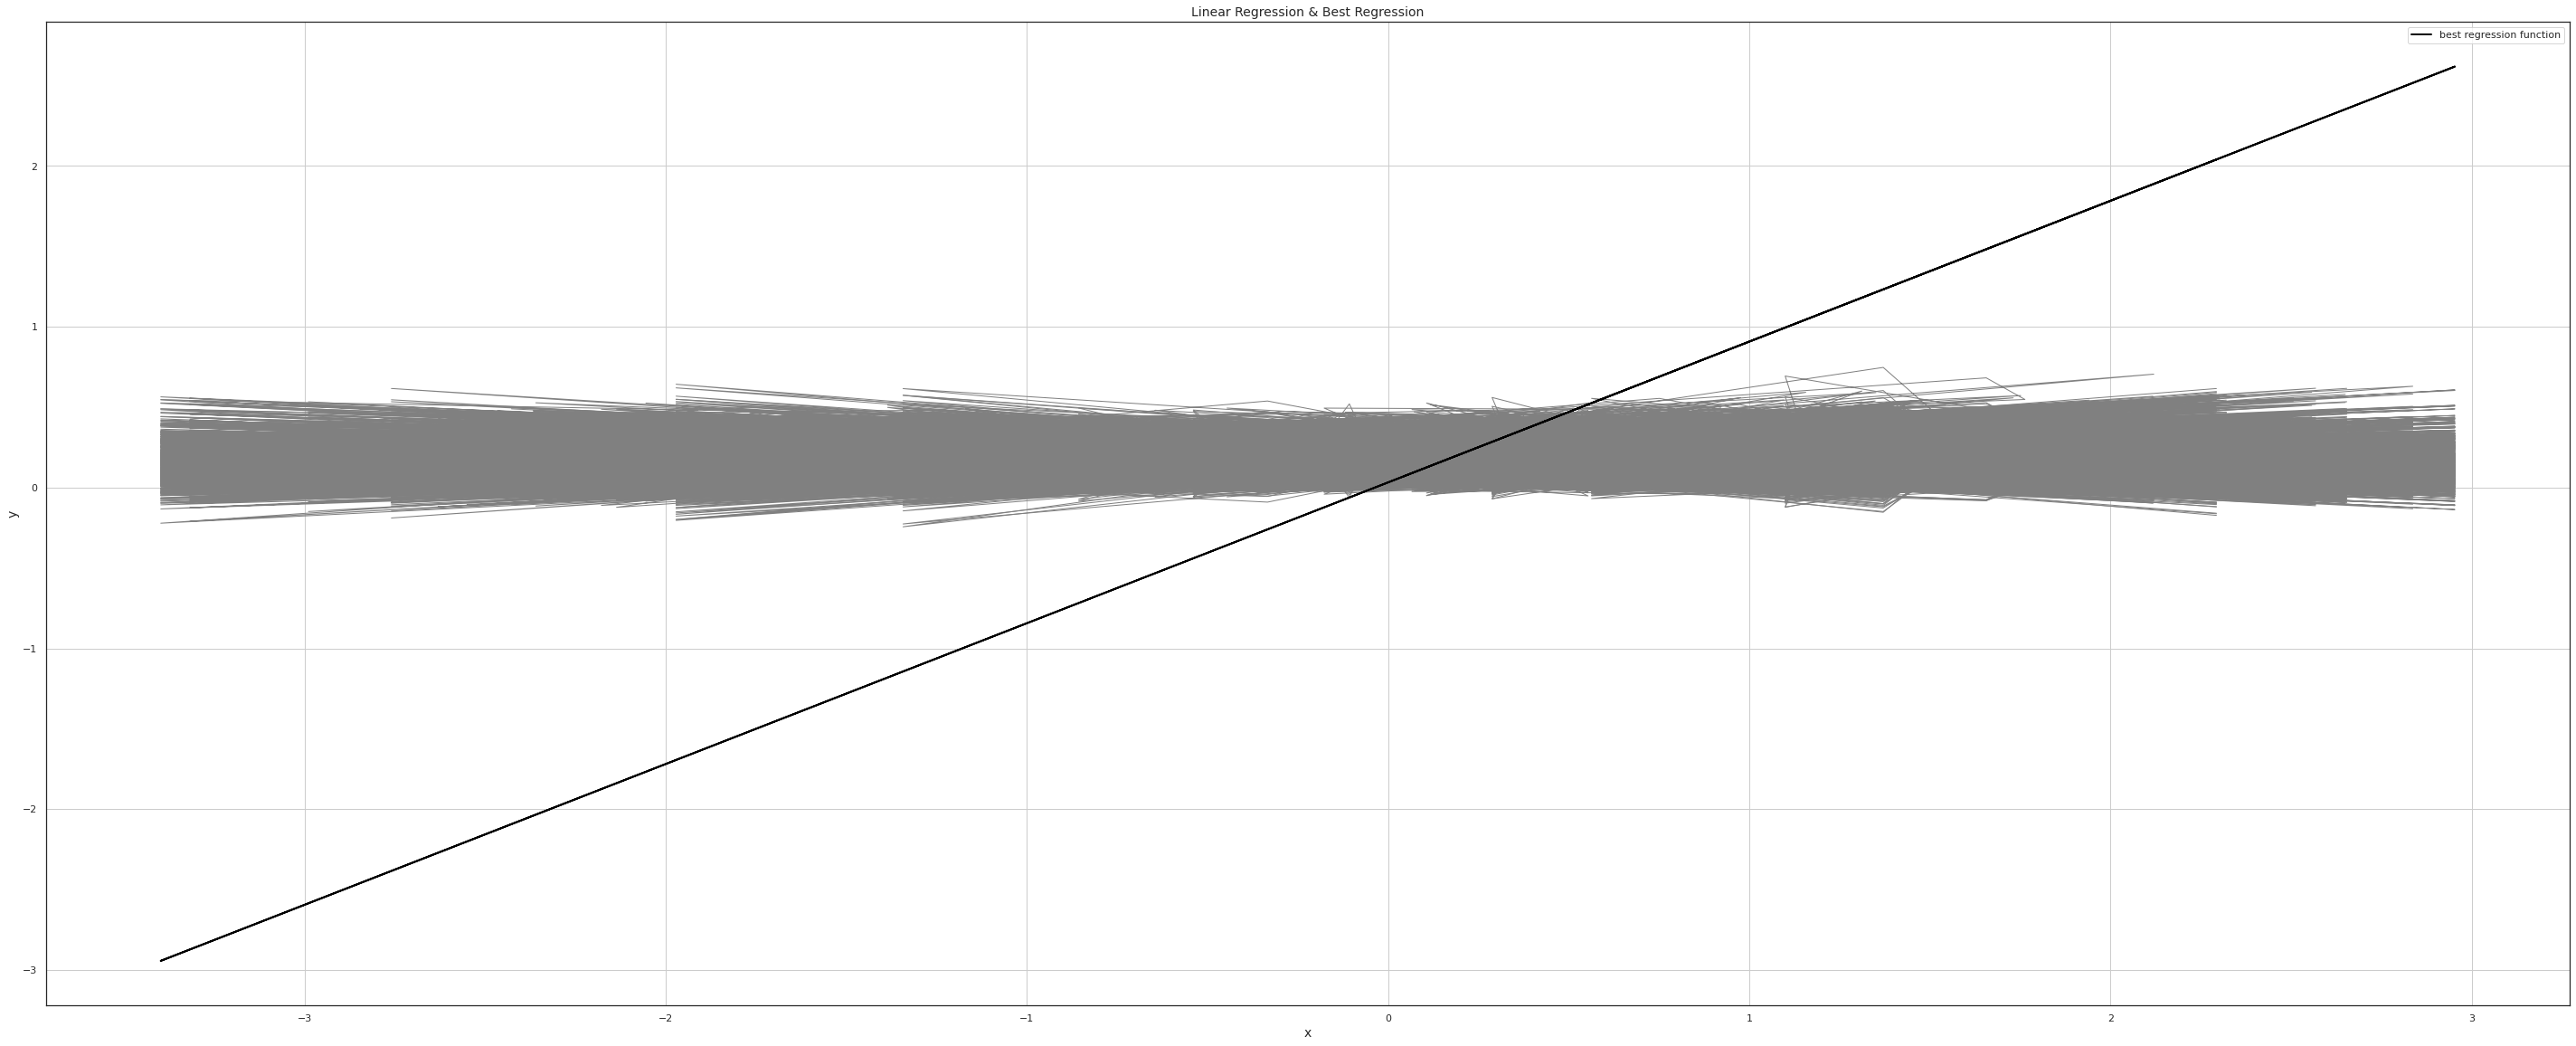

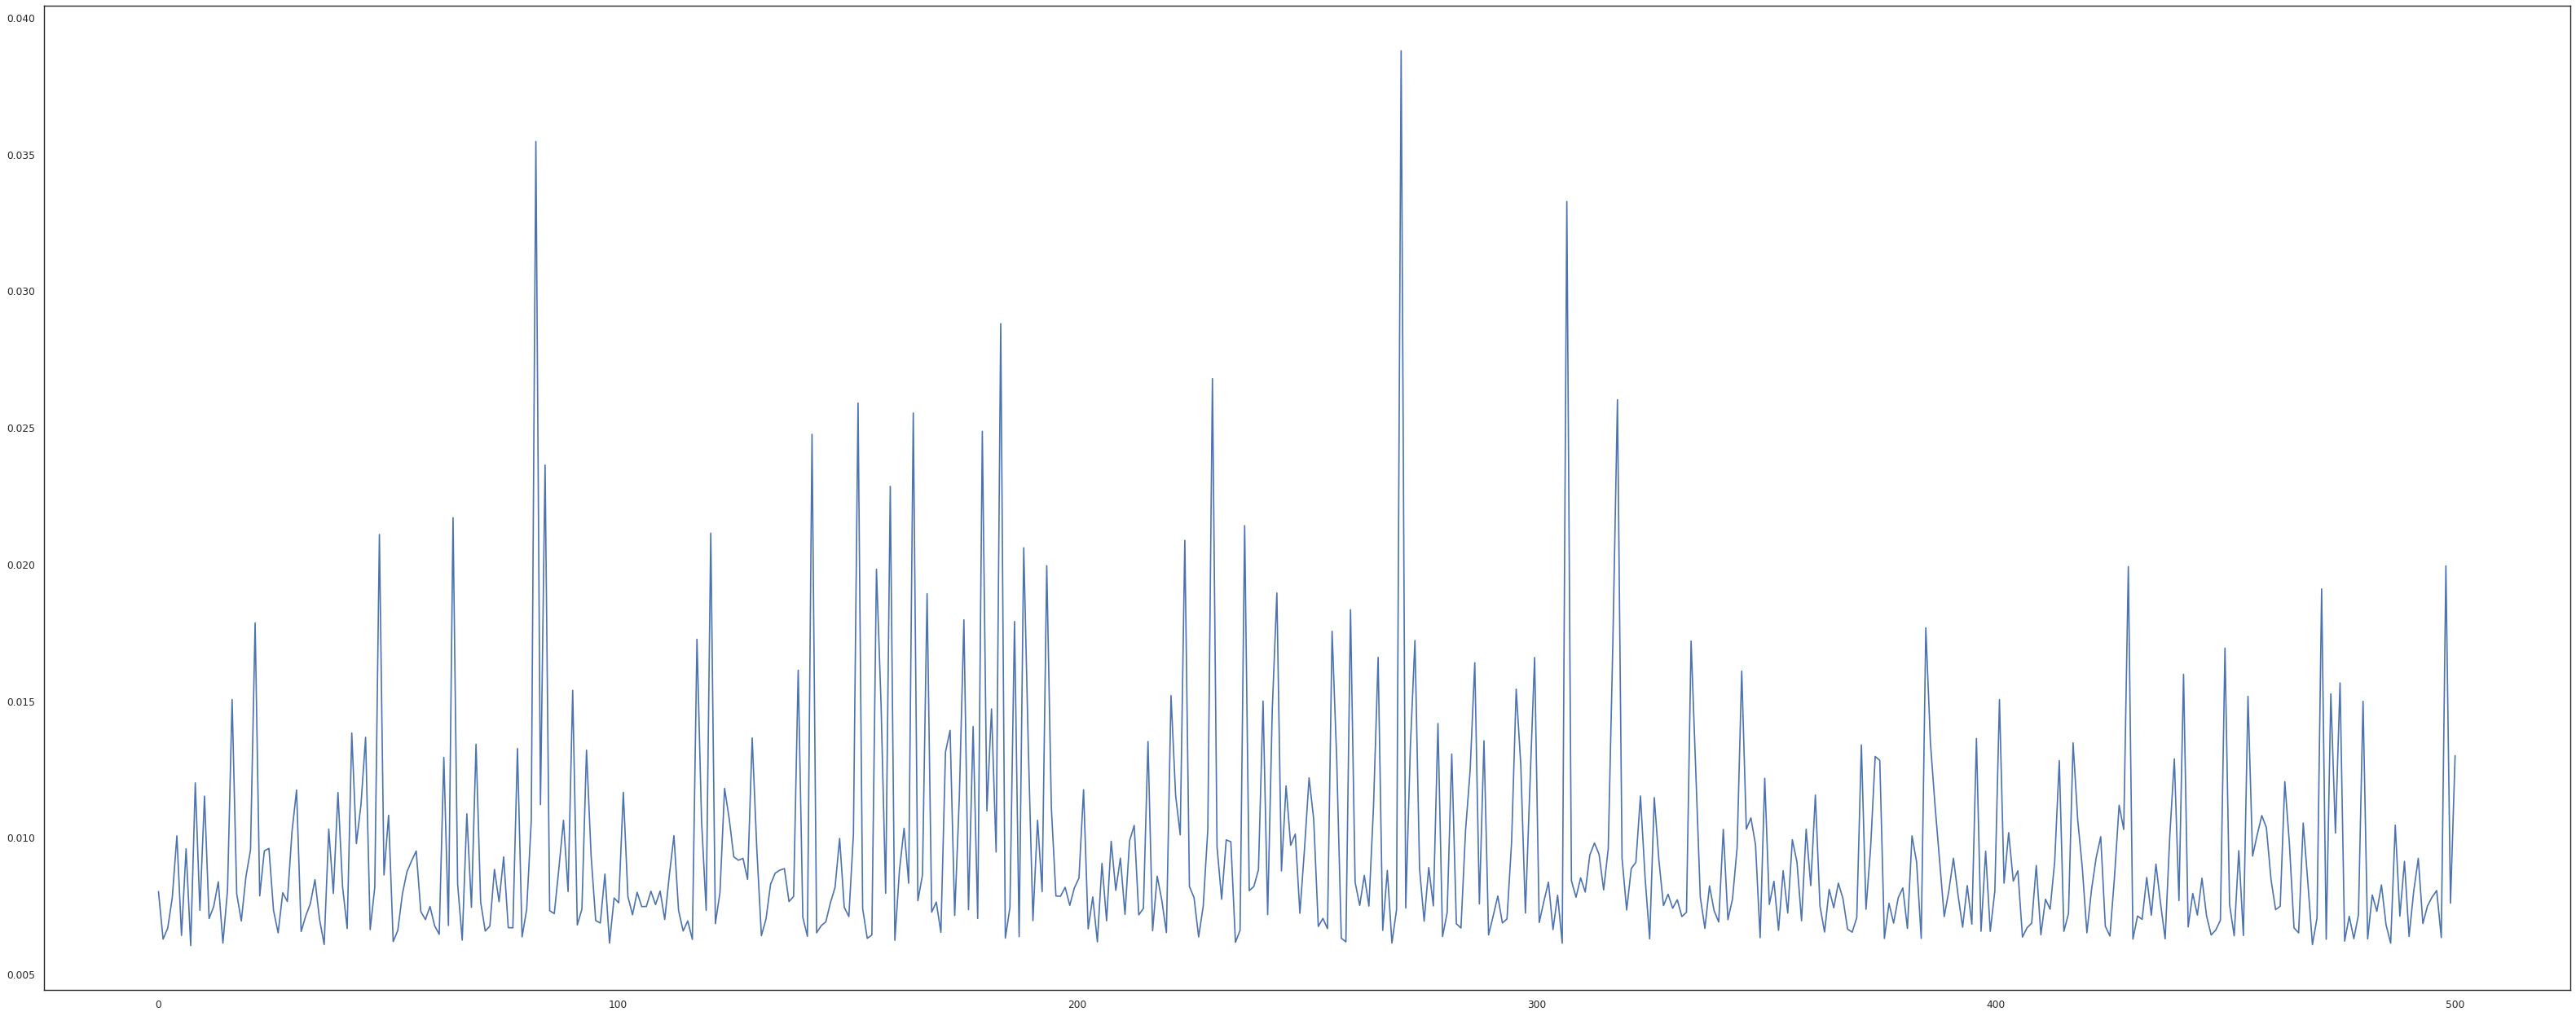

In [69]:
N = 500
num_samples = 1000
vector_MCBeta = []
vector_MC_MSE_Linear= []

plt.figure(figsize=(50,20))
plt.title('Linear Regression & Best Regression', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
x_plot = np.linspace(-2, 2, num_samples)
X_plot = x_plot[:, np.newaxis]

for j in range(N):
  result = crude_monte_carlo(10)
  result_model = result[0]
  beta = result[1]
  vector_MCBeta.append(beta) 
  # linear
  target_pred = result_model.predict(data_test)
  vector_MC_MSE_Linear.append(mean_squared_error(target_test, target_pred))  
  plt.plot(data_test[:,0], target_pred, color='gray', linewidth=1)  #linear model

# conditional
AVG_vector_MC_Beta = np.mean(vector_MCBeta)  
E_x = statistics.mean(data_test[:,0])
E_y = statistics.mean(data_test[:,1])
y_given_by_x_MC = E_y + (AVG_vector_MC_Beta * (data_test[:,0] - E_x))
plt.plot(data_test[:,0], y_given_by_x_MC, color='black', linewidth=2, label='best regression function')  # best regression function
# plt.ylim(((np.min(vector_MC_MSE_Linear)-2),((np.max(vector_MC_MSE_Linear)+2))))
plt.legend()
plt.show()

# plot 500 MSE values, one for each trained model.
fig = plt.figure(num=None, figsize=(50,20),dpi=80,facecolor='w',edgecolor='k')
ax0 = fig.add_subplot(111)
x_plot = np.linspace(0, N, N)
X_plot = x_plot[:, np.newaxis]
ax0.plot(x_plot, vector_MC_MSE_Linear)
plt.show()


Mean Of MSE: 0.009678528434418776
Variance Of MSE: 0.000018928267934276


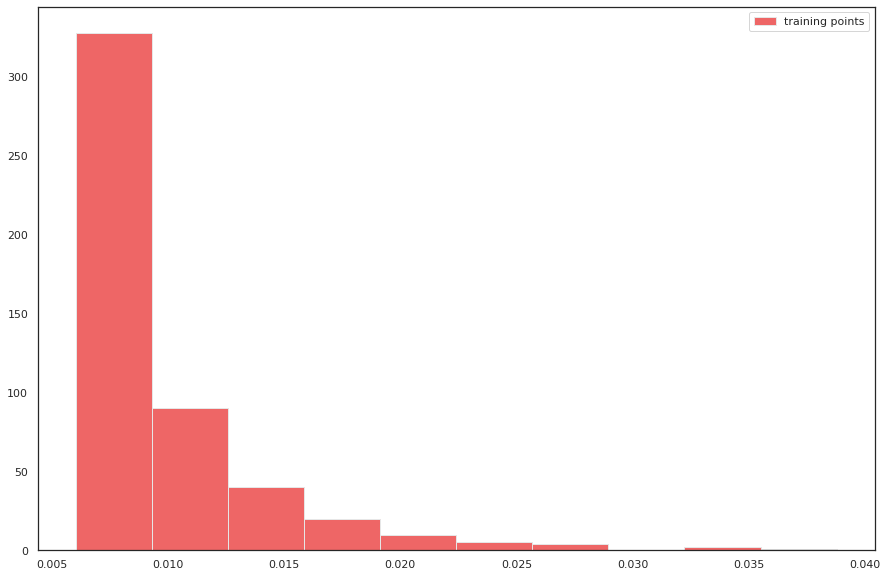

In [70]:
# summary statistics over the Monte Carlo simulation
AVG_vector_MC_MSE = np.mean(vector_MC_MSE_Linear)
VAR_vector_MC_MSE= np.var(vector_MC_MSE_Linear) 
print('Mean Of MSE: %.18f' % AVG_vector_MC_MSE)
print('Variance Of MSE: %.18f' % VAR_vector_MC_MSE)

# histogram using all estimated mse from the Monte Carlo simulation
NpArray_vector_MC_MSE = np.array(vector_MC_MSE_Linear)
vector_MC_MSEForHistogram = NpArray_vector_MC_MSE.ravel()
plt.figure(figsize=(15,10))
plt.hist(vector_MC_MSEForHistogram ,  bins=10,label="training points", edgecolor='#E6E6E6', color='#EE6666')

plt.legend(loc='upper left')
plt.legend()
plt.show()

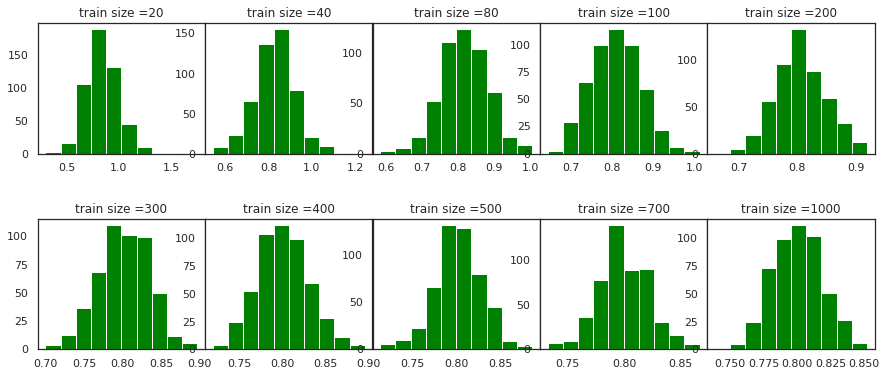

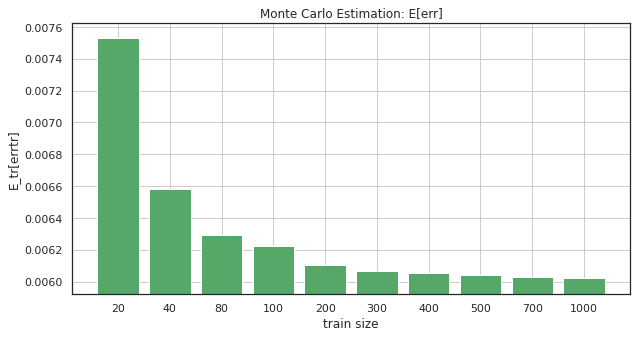

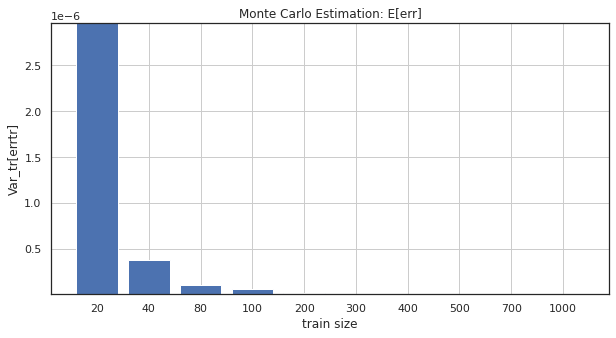

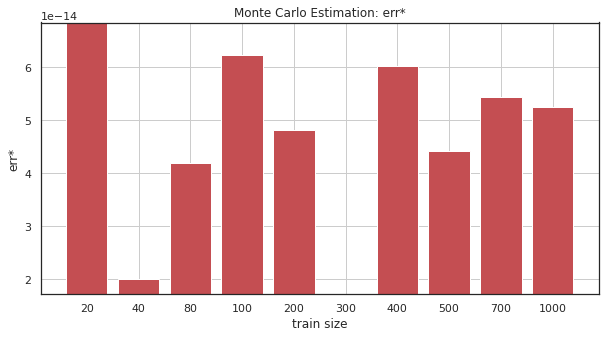

In [71]:
N = 500
train_size = [20, 40, 80, 100, 200, 300, 400, 500, 700, 1000]
num_samples = 1000
vector_MC_MSE_Linear= np.zeros([len(train_size),N])
vector_MCBeta = np.zeros([len(train_size),N])

AVG_vector_MC_MSE = []
STDDEV_vector_MC_MSE= [] 
AVG_vector_MC_err = []
AVG_vector_MC_Beta = []

x_plot = np.linspace(-2, 2, num_samples)
X_plot = x_plot[:, np.newaxis]

fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
for i in range(len(train_size)):
    for j in range(N):
      result = crude_monte_carlo(train_size[i])
      result_model = result[0]
      beta = result[1]
      vector_MCBeta[i,j] = beta 
      # linear
      target_pred = result_model.predict(data_test)
      vector_MC_MSE_Linear[i,j] = mean_squared_error(target_test, target_pred)  

    # conditional
    AVG_vector_MC_Beta.append(np.mean(vector_MCBeta[i,:]))
    E_x = statistics.mean(data_test[:,0])
    E_y = statistics.mean(data_test[:,1])
    y_given_by_x_MC_Train = E_y_test + (AVG_vector_MC_Beta[i] * (data_test[:,0] - E_x_test))

    err = 0
    for k in range(y_given_by_x_MC_Train.shape[0]):
        err += (data_test[k,1] - y_given_by_x_MC_Train[k])

    AVG_vector_MC_err.append(err)
    AVG_vector_MC_MSE.append(np.mean(vector_MC_MSE_Linear[i,:]))
    STDDEV_vector_MC_MSE.append(np.var(vector_MC_MSE_Linear[i,:])) 

    #hist for beta
    NpArray_vector_MC_beta = np.array(vector_MCBeta[i,:])
    vector_MC_betaForHistogram = NpArray_vector_MC_beta.ravel()
    title = 'train size =' + str(train_size[i])
    axs[i].hist(vector_MC_betaForHistogram ,  bins=10, color= 'green')
    axs[i].set_title(title)

plt.figure(figsize=(10,5))
label = ['20', '40', '80', '100', '200', '300', '400', '500', '700', '1000']
plt.bar(label, AVG_vector_MC_MSE, align='center', color='g')
plt.ylim((np.min(AVG_vector_MC_MSE)-0.0001),(np.max(AVG_vector_MC_MSE)+0.0001))
plt.ylabel('E_tr[errtr]')
plt.xlabel('train size')
plt.title("Monte Carlo Estimation: E[err]")
plt.grid(True)

plt.figure(figsize=(10,5))
label = ['20', '40', '80', '100', '200', '300', '400', '500', '700', '1000']
plt.bar(label, STDDEV_vector_MC_MSE, align='center', color='b')
plt.ylabel('Var_tr[errtr]')
plt.ylim((np.min(STDDEV_vector_MC_MSE)),(np.max(STDDEV_vector_MC_MSE)-0.000001))
plt.xlabel('train size')
plt.title("Monte Carlo Estimation: E[err]")
plt.grid(True)

plt.figure(figsize=(10,5))
label = ['20', '40', '80', '100', '200', '300', '400', '500', '700', '1000']
plt.bar(label, AVG_vector_MC_err, align='center', color='r')
plt.ylabel('err*')
plt.ylim((np.min(AVG_vector_MC_err)),(np.max(AVG_vector_MC_err)))
plt.xlabel('train size')
plt.title("Monte Carlo Estimation: err*")
plt.grid(True)



In [0]:
def monte_carlo_proba(num_simulations, num_samples, verbose=True, plot=False):
    
    if verbose:
        print("===========================================")
        print("{} Monte Carlo Simulations of size {}".format(num_simulations, num_samples))
        print("===========================================\n")
    
    num_samples = int(num_samples)
    num_simulations = int(num_simulations)
    
    probas = []
    for i in range(num_simulations):

        rv = multivariate_normal([0., 0.], [[1., 0.8], [0.8, 1.]])
        data = rv.rvs(size=num_samples)
        target = rv.pdf(data)

        linear_reg = LinearRegression().fit(data, target)
        y_pred = linear_reg.predict(data)

        sum = 0
        for i in range(num_samples):
           sum += y_pred[i]

        proba = sum / num_samples
        probas.append(proba)

    mean_proba = np.mean(probas)
    std_proba = np.std(probas)
    
    if verbose:
        print("Probability Mean: {:0.5f}".format(mean_proba))
        print("Probability Std: {:0.5f}".format(std_proba))
    
    return probas




In [73]:
probas = monte_carlo_proba(500, 10, plot=True)

500 Monte Carlo Simulations of size 10

Probability Mean: 0.13200
Probability Std: 0.02414


In [74]:

num_samples = [20, 40, 80, 100, 200, 300, 400, 500, 700, 1000]
num_repetitions = 500

total_probas = []
for i, num_sample in enumerate(num_samples):
    print("Iter {}/{}".format(i+1, len(num_samples)))
    probas = monte_carlo_proba(num_repetitions, num_sample, verbose=False)
    total_probas.append(probas)

Iter 1/10
Iter 2/10
Iter 3/10
Iter 4/10
Iter 5/10
Iter 6/10
Iter 7/10
Iter 8/10
Iter 9/10
Iter 10/10


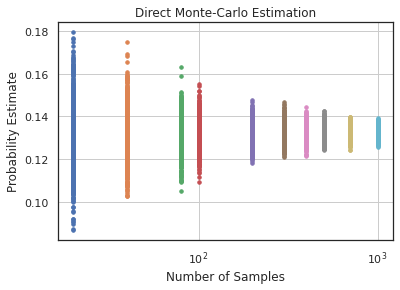

In [75]:
y_axis = np.asarray(total_probas)
x_axis = np.asarray(num_samples)

for x, y in zip(x_axis, y_axis):
    plt.scatter([x] * len(y), y, s=12)

plt.xscale('log')
plt.title("Direct Monte-Carlo Estimation")
plt.ylabel("Probability Estimate")
plt.xlabel('Number of Samples')
plt.grid(True)
plt.show()